In [2]:
import yt
import pyxsim
import matplotlib.pyplot as plt
import soxs
import numpy as np
import re
import struct
import sys
import warnings
from io import open
import h5py
import astropy
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy.io import fits
import numpy as np


soxs : [WARNING  ] 2024-06-07 12:29:55,210 Setting 'soxs_data_dir' to /Users/andrewwright/Library/Caches/soxs for this session. Please update your configuration if you want it somewhere else.


In [3]:
#pip install -U soxs

In [4]:
print("Numpy:      {}".format(np.__version__))
print("SOXS:     {}".format(soxs.__version__))
print("YT:     {}".format(yt.__version__))
print("Pyxsim:     {}".format(pyxsim.__version__))

Numpy:      1.25.1
SOXS:     4.8.4
YT:     4.3.0
Pyxsim:     4.4.1.dev10+g6f05a2d


# Loading in Data

In [5]:
import yt
from yt.units import Msun, pc, kyr
#width is 10pc radius 5pc

units_override = {
    "length_unit": (1.0, "pc"),
    "time_unit": (1.0, "kyr"),
    "mass_unit": (1.0, "Msun"),
}

ds = yt.load("/Volumes/Extern/torus_rst.out2.00350.athdf",units_override=units_override, unit_system="cgs",
             magnetic_normalization="lorentz_heaviside",default_species_fields='ionized')
#units_override=units_override

yt : [WARNING  ] 2024-06-07 12:29:56,539 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-06-07 12:29:56,540 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-06-07 12:29:56,541 Overriding time_unit: 1.0 kyr.
yt : [INFO     ] 2024-06-07 12:29:56,541 Overriding mass_unit: 1.0 Msun.
yt : [WARNING  ] 2024-06-07 12:29:56,542 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-06-07 12:29:56,621 Parameters: current_time              = 350.00012
yt : [INFO     ] 2024-06-07 12:29:56,622 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-06-07 12:29:56,623 Parameters: domain_left_edge          = [-5. -5. -5.]
yt : [INFO     ] 2024-06-07 12:29:56,623 Parameters: domain_right_edge         = [5. 5. 5.]
yt : [INFO     ] 2024-06-07 12:29:56,624 Parameters: cosmological_simulation   = 0


In [10]:
import yt
#width is 10pc radius 5pc

units_override = {
    "length_unit": (1.0, "pc"),
    "time_unit": (1.0, "kyr"),
    "mass_unit": (1.0,"msun")
}

dsRAM = yt.load("/Volumes/Extern/torus_rst.out2.00350.athdf", units_override=units_override,unit_system="cgs", default_species_fields="ionized")

yt : [WARNING  ] 2024-06-07 12:30:10,809 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-06-07 12:30:10,810 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-06-07 12:30:10,811 Overriding time_unit: 1.0 kyr.
yt : [INFO     ] 2024-06-07 12:30:10,812 Overriding mass_unit: 1.0 Msun.
yt : [WARNING  ] 2024-06-07 12:30:10,813 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-06-07 12:30:10,873 Parameters: current_time              = 350.00012
yt : [INFO     ] 2024-06-07 12:30:10,874 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-06-07 12:30:10,875 Parameters: domain_left_edge          = [-5. -5. -5.]
yt : [INFO     ] 2024-06-07 12:30:10,876 Parameters: domain_right_edge         = [5. 5. 5.]
yt : [INFO     ] 2024-06-07 12:30:10,876 Parameters: cosmological_simulation   = 0


In [11]:
X_H = 0.74 # hydrogen mass fraction
from yt.units import mp # proton mass
T_neut = 10**4 # define some temperature below which the gas is neutral

def _neutral_h_density(field, data):

    nH = data['gas', 'H_nuclei_density']

    fac = np.zeros_like(nH.d)

    fac[data["gas", "temperature"] < T_neut] = 1.0

    return fac*nH

In [12]:
ds.add_field(("gas","H_p0_number_density"), _neutral_h_density, sampling_type="local", units="cm**-3")

yt : [WARNING  ] 2024-06-07 12:30:12,044 Field ('gas', 'H_p0_number_density') already exists. To override use `force_override=True`.


In [13]:
dd = ds.all_data()

In [14]:
ddRAM = dsRAM.all_data()

In [15]:
cold = dd.include_below(("gas", "temperature"), 10**5) #field, min, max

In [16]:
fronts = dd.exclude_inside(("gas", "z"), -2e+19, 0.0)

In [17]:
backs = dd.exclude_inside(("gas", "z"), 0.0, 2e+19) 

In [18]:
ds.derived_field_list

[('athena_pp', 'cell_volume'),
 ('athena_pp', 'dx'),
 ('athena_pp', 'dy'),
 ('athena_pp', 'dz'),
 ('athena_pp', 'path_element_x'),
 ('athena_pp', 'path_element_y'),
 ('athena_pp', 'path_element_z'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3'),
 ('athena_pp', 'volume'),
 ('athena_pp', 'x'),
 ('athena_pp', 'y'),
 ('athena_pp', 'z'),
 ('gas', 'El_number_density'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'H_p0_number_density'),
 ('gas', 'H_p1_number_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'He_p2_number_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('

# The plots below can be used for all of the loaded simulations (Athena++ and RAMSES)
# DO NOT apply the L or north vector for the RAMSES rotation!!!
# For RAMSES plug in z for the L and dont apply any north_vector

yt : [INFO     ] 2024-06-07 12:33:19,479 xlim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:19,481 ylim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:19,481 zlim = -5.000000 5.000000
yt : [INFO     ] 2024-06-07 12:33:19,484 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



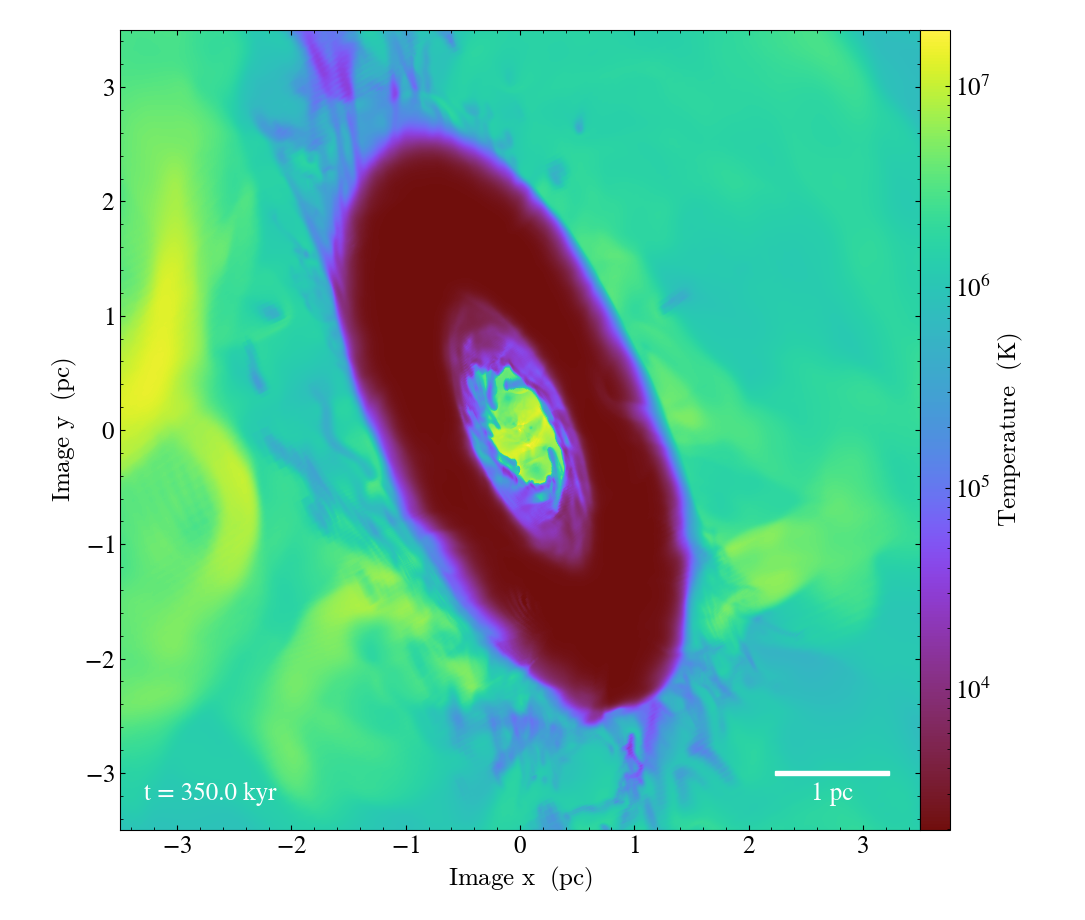

yt : [INFO     ] 2024-06-07 12:33:37,771 xlim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:37,773 ylim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:37,773 zlim = -5.000000 5.000000
yt : [INFO     ] 2024-06-07 12:33:37,775 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



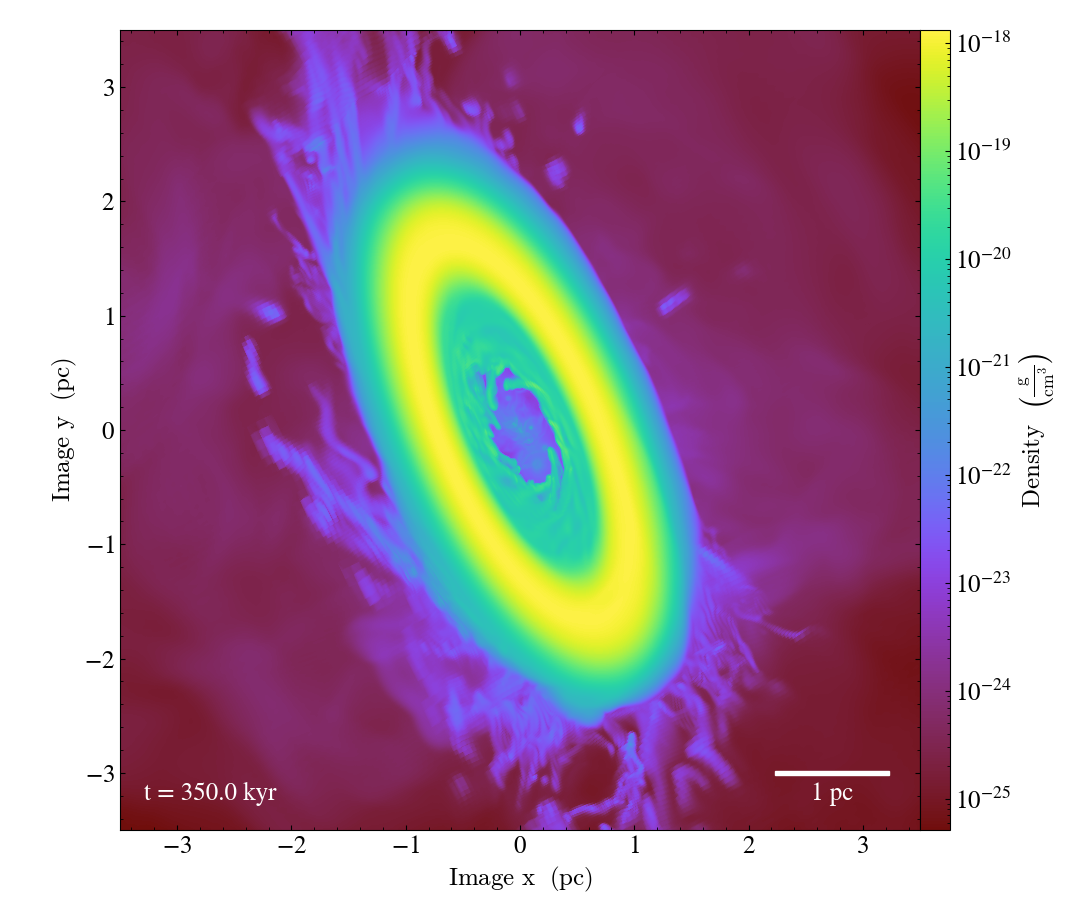

yt : [INFO     ] 2024-06-07 12:33:51,669 xlim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:51,670 ylim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:33:51,671 zlim = -5.000000 5.000000
yt : [INFO     ] 2024-06-07 12:33:51,672 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



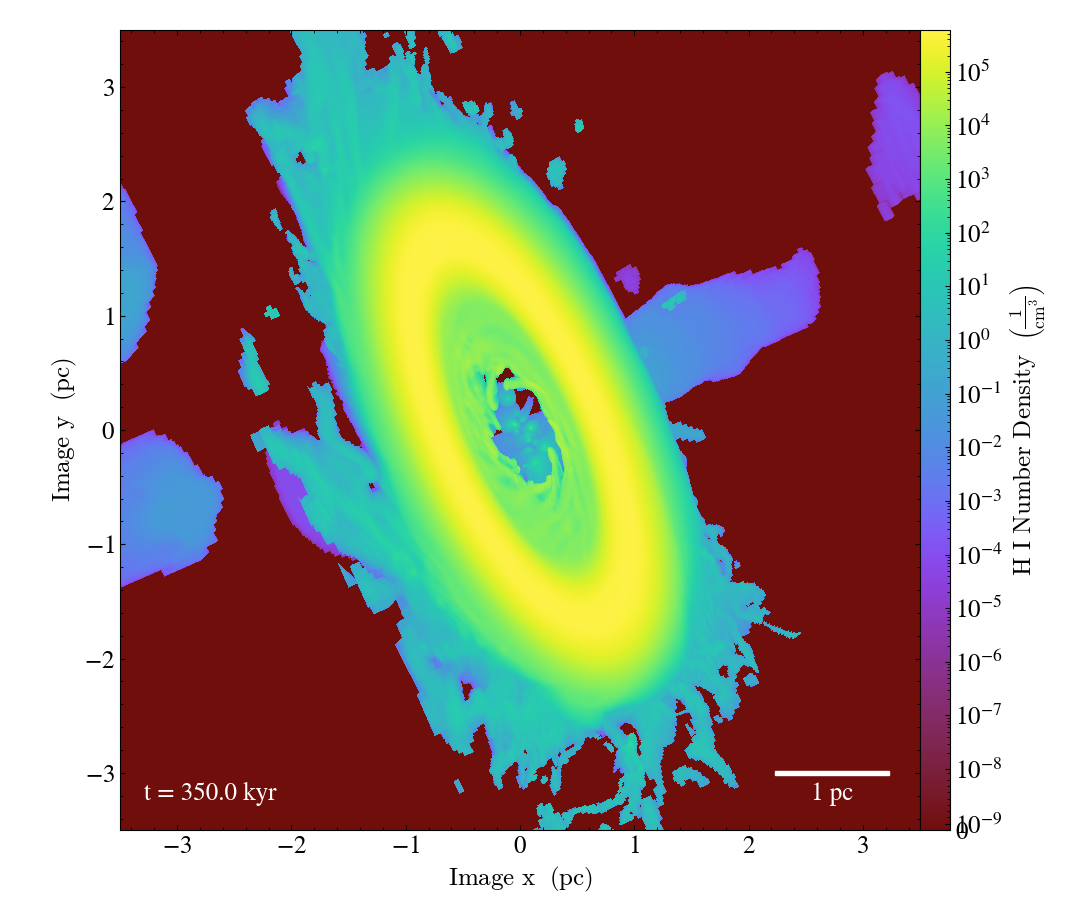

yt : [INFO     ] 2024-06-07 12:34:13,868 xlim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:34:13,869 ylim = -3.500000 3.500000
yt : [INFO     ] 2024-06-07 12:34:13,871 zlim = -5.000000 5.000000
yt : [INFO     ] 2024-06-07 12:34:13,872 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800


In [ ]:
# the following plots can be used for all of the loaded simulations 
# DO NOT apply the L or north vector for the RAMSES rotation!!!
# For ramses plug in z for the L and dont apply any north_vector

L = [ 0.91354546, 0.15236623,  -0.37711965] # vector normal to cutting plane
N = [ 0.374606593,  -0.927183855,  0.374606593] #vector pointing up "North"


prj = yt.ProjectionPlot(
    ds, L, ('gas', 'temperature'), weight_field=("gas", "density"), width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj.set_width((7, "pc"))
prj.set_axes_unit("pc")
prj.annotate_scale()
prj.annotate_timestamp()

prj.show()



prj1 = yt.ProjectionPlot(
    ds, L, ('gas', 'density'), weight_field=("gas", "density"), width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj1.set_width((7, "pc"))
prj1.set_axes_unit("pc")
prj1.annotate_scale()
prj1.annotate_timestamp()

prj1.show()


#the two below basically shows the column density map for the absorption

prj2 = yt.ProjectionPlot(
    ds, L, ("gas","H_p0_number_density"),  weight_field=("gas", "density"),width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((7, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()

prj2 = yt.ProjectionPlot(
    ds, L, ("gas","H_p0_number_density"),width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((7, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()


#the two plots below helps show the movement of the gas in a 3D space
prj2 = yt.ProjectionPlot(
    ds, L, ('gas', 'momentum_density_x'), width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((7, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()


prj2 = yt.ProjectionPlot(
    ds, L, ('gas', 'momentum_density_y'), width=(7, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((7, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()



#the plots below shows how the rotation changed the axes of the simulation

prj2 = yt.ProjectionPlot(
    ds, L, ('gas', 'x'), width=(15, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((15, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()


prj2 = yt.ProjectionPlot(
    ds, L, ('gas', 'y'), width=(15, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((15, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()



prj2 = yt.ProjectionPlot(
    ds, L, ('gas', 'z'), width=(15, "pc"),north_vector=N, method = ("integrate")
)

prj2.set_width((15, "pc"))
prj2.set_axes_unit("pc")
prj2.annotate_scale()
prj2.annotate_timestamp()
prj2.show()



